# iShares S&P 500 Top 20 ETF 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '313A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-04-18 00:00:00+09:00,159.300003,159.899994,158.500000,159.699997,82360,0.0,0.0,0.0
2025-04-21 00:00:00+09:00,157.800003,157.800003,155.300003,155.300003,1003980,0.0,0.0,0.0
2025-04-22 00:00:00+09:00,153.500000,153.800003,152.000000,152.800003,306120,0.0,0.0,0.0
2025-04-23 00:00:00+09:00,161.000000,161.000000,159.100006,160.300003,98420,0.0,0.0,0.0
2025-04-24 00:00:00+09:00,163.100006,163.100006,160.899994,161.199997,164240,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

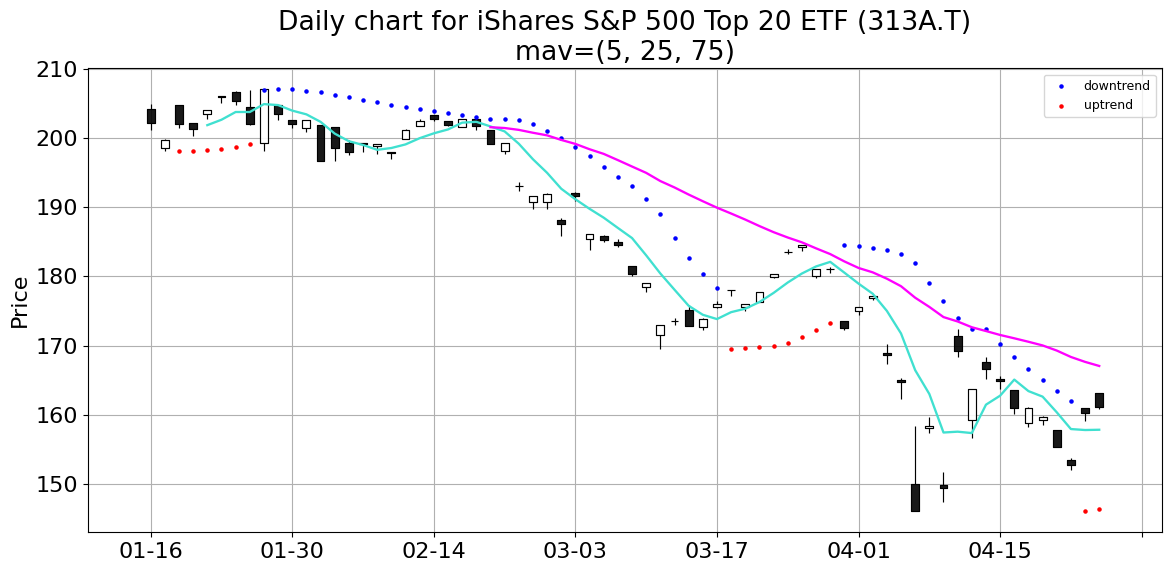

In [3]:
dict_psar = psar(df)

plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-04-23 00:00:00+09:00    160.300003
2025-04-24 00:00:00+09:00    161.199997
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-04-23 00:00:00+09:00         NaN
2025-04-24 00:00:00+09:00    0.899994
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-04-23 00:00:00+09:00    157.820001
2025-04-24 00:00:00+09:00    157.860001
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-04-23 00:00:00+09:00    167.660
2025-04-24 00:00:00+09:00    167.068
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-04-23 00:00:00+09:00   NaN
2025-04-24 00:00:00+09:00   NaN
Name: Close, dtype: float64